In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17427174647205970044
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16326864609341754945
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
print('Number of samples in our training data:',str(len(x_train)))
print('Number of labels in our training data:',str(len(y_train)))
print('Number of samples in our testing data:',str(len(x_test)))
print('Number of labels in our testing data:',str(len(y_test)))

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our testing data: 10000
Number of labels in our testing data: 10000


In [ ]:
print('Dimmensions of x_train: ',x_train[0].shape)
print('Dimmensions of x_test: ',x_test[0].shape)

Dimmensions of x_train:  (28, 28)
Dimmensions of x_test:  (28, 28)


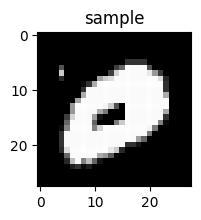

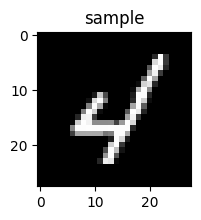

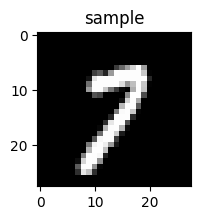

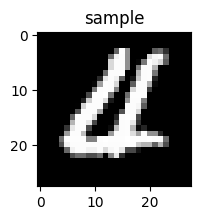

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def imshow(title, image=None,size=6):
  w=image.shape[0]
  h=image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()
for i in range(0,4):
  random_num=np.random.randint(0,len(x_train))
  img=x_train[random_num]
  imshow('sample',img,size=2)#displaying 6 random images from our sample

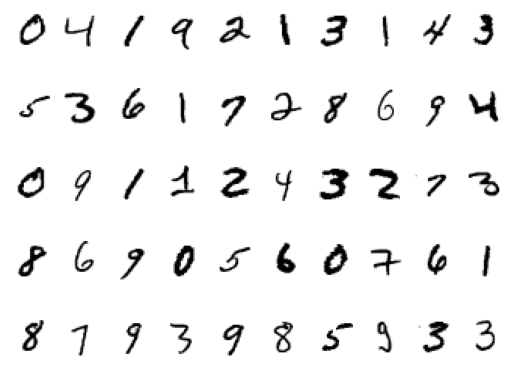

In [ ]:
import matplotlib.pyplot as plt
figure=plt.figure()
num_of_images=50
for index in range(1,num_of_images+1):
  plt.subplot(5,10,index)
  plt.axis('off')
  plt.imshow(x_train[index], cmap='gray_r')

**We need to prepare our dataset firstly before training it through our CNN.**
1. Reshaping our data by adding our 4th dimmension
2. Changing our datatype from int to float
3. Normalizing our data to values between 0 and 1 and applying One Hot Encoding

In [ ]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1) #converting image from (60000,28,28)-->(60000,28,28,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1) #storing the shape of a single image
x_train=x_train.astype('float32') #changing image type from int to float
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0
print('x_train shape: ', x_train.shape)

x_train shape:  (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print('Number of classes: ',str(y_test.shape[1]))
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of classes:  10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) #1st Convolution layer --> layer size=26x26x32
model.add(Conv2D(64,(3,3),activation='relu'))                                     #2nd Convolution layer --> layer size=24x24x64
model.add(MaxPooling2D(pool_size=(2,2)))                                          #Maxpooling layer      --> layer size=12x12x64
model.add(Flatten())                                                              #Flatten layer         --> layer size=9216x1
model.add(Dense(128,activation='relu'))                                           #Fully connected dense layer--> layer size=1x128
model.add(Dense(num_classes, activation='softmax'))                               #final fully connected dense layer for each class. i.e total classes =10

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=25,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss=', score[0])
print('test accuracy=', score[1])

Epoch 1/25
469/469 [==============================] - 8s 9ms/step - loss: 2.2425 - accuracy: 0.3918 - val_loss: 2.1578 - val_accuracy: 0.5154
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 1.8964 - accuracy: 0.6009 - val_loss: 1.4043 - val_accuracy: 0.7220
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.9126 - accuracy: 0.7947 - val_loss: 0.5802 - val_accuracy: 0.8525
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5058 - accuracy: 0.8636 - val_loss: 0.4188 - val_accuracy: 0.8856
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.4084 - accuracy: 0.8835 - val_loss: 0.3620 - val_accuracy: 0.8988
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3662 - accuracy: 0.8942 - val_loss: 0.3316 - val_accuracy: 0.9053
Epoch 7/25
469/469 [==============================] - 5s 11ms/step - loss: 0.3399 - accuracy: 0.9014 - val_loss: 0.3095 - val_accuracy: 0.9116
Epoch

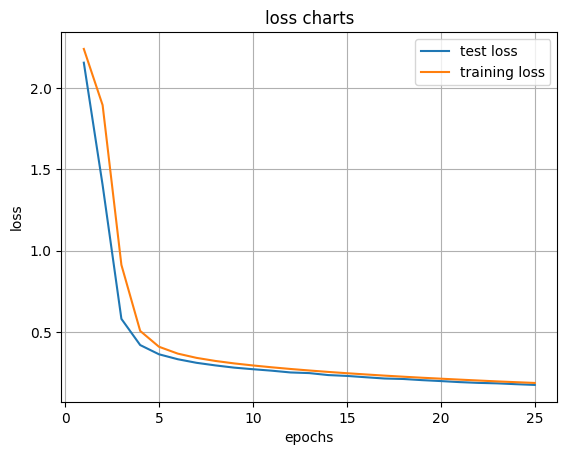

In [ ]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='test loss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss charts')
plt.grid(True)
plt.legend()
plt.show()

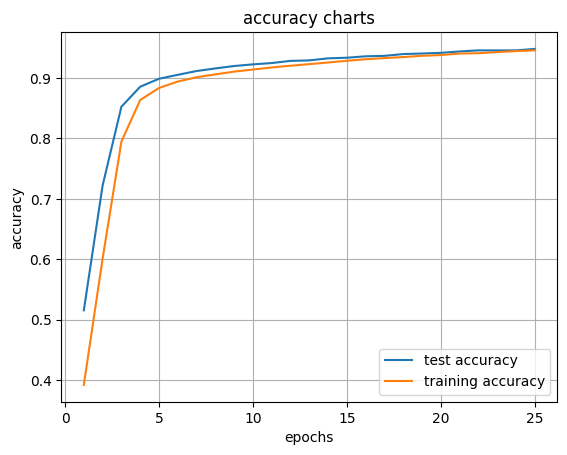

In [ ]:
import matplotlib.pyplot as plt
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label='test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy charts')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

In [ ]:
print('Predicting classes for our 10000 test images')
pred=np.argmax(classifier.predict(x_test),axis=-1)
print(pred)
len(pred)

Predicting classes for our 10000 test images
313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


10000

1/1 [==============================] - 0s 201ms/step


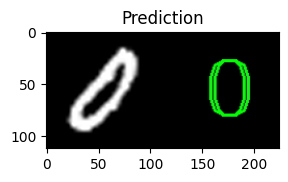

1/1 [==============================] - 0s 30ms/step


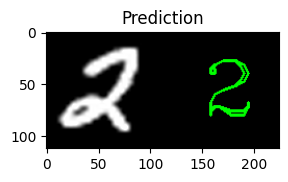

1/1 [==============================] - 0s 26ms/step


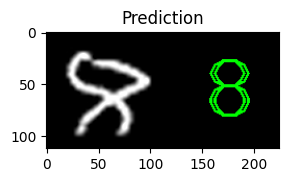

1/1 [==============================] - 0s 25ms/step


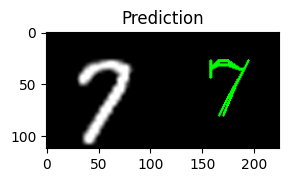

1/1 [==============================] - 0s 26ms/step


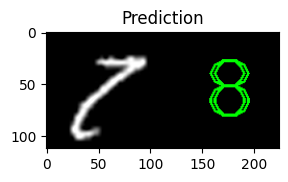

1/1 [==============================] - 0s 16ms/step


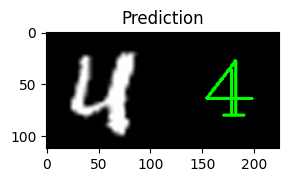

1/1 [==============================] - 0s 19ms/step


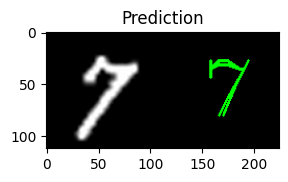

1/1 [==============================] - 0s 18ms/step


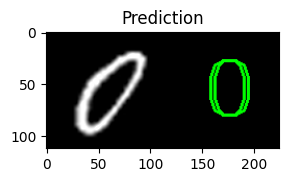

1/1 [==============================] - 0s 16ms/step


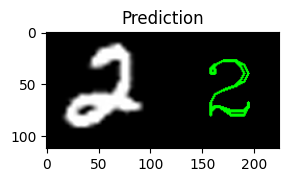

1/1 [==============================] - 0s 18ms/step


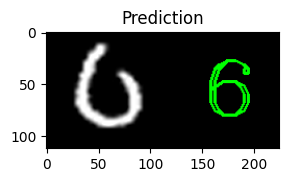

In [ ]:
import cv2
import numpy as np
(x_train, y_train), (x_test, y_test)  = mnist.load_data() #need to reload the data since we rescaled it

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]  #creating a blur background
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])
    draw_test("Prediction", res,  np.uint8(imageL))

In [ ]:
import numpy as np
print(x_test.shape)
x_test=x_test.reshape(10000,28,28,1)
print(x_test.shape)
print('Predicting classes for our 10000 test images')
pred=np.argmax(classifier.predict(x_test),axis=-1)
print(pred)


(10000, 28, 28)
(10000, 28, 28, 1)
Predicting classes for our 10000 test images
313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [ ]:
import cv2
import numpy as np
result=np.absolute(y_test-pred)
misclassified_indices=np.nonzero(result>0)
print(misclassified_indices)

(array([   8,   62,   87,   92,  124,  149,  233,  241,  247,  259,  300,
        313,  318,  320,  321,  340,  352,  358,  362,  381,  444,  445,
        448,  449,  478,  502,  507,  531,  565,  578,  582,  591,  610,
        613,  619,  628,  659,  684,  689,  691,  707,  717,  720,  740,
        760,  791,  795,  810,  839,  844,  898,  938,  947,  950,  965,
        975,  990, 1012, 1014, 1032, 1039, 1044, 1062, 1068, 1107, 1112,
       1114, 1173, 1181, 1182, 1192, 1194, 1198, 1204, 1206, 1226, 1232,
       1234, 1242, 1247, 1253, 1256, 1260, 1270, 1283, 1289, 1299, 1319,
       1325, 1326, 1328, 1337, 1378, 1393, 1410, 1440, 1444, 1453, 1494,
       1500, 1522, 1525, 1527, 1530, 1549, 1553, 1569, 1581, 1587, 1609,
       1621, 1634, 1640, 1678, 1681, 1709, 1717, 1721, 1754, 1772, 1774,
       1790, 1813, 1828, 1850, 1865, 1878, 1883, 1901, 1940, 1941, 1952,
       1970, 1981, 1984, 2016, 2024, 2033, 2035, 2043, 2044, 2053, 2070,
       2098, 2109, 2118, 2129, 2130, 2135, 2174, 2

1/1 [==============================] - 0s 16ms/step


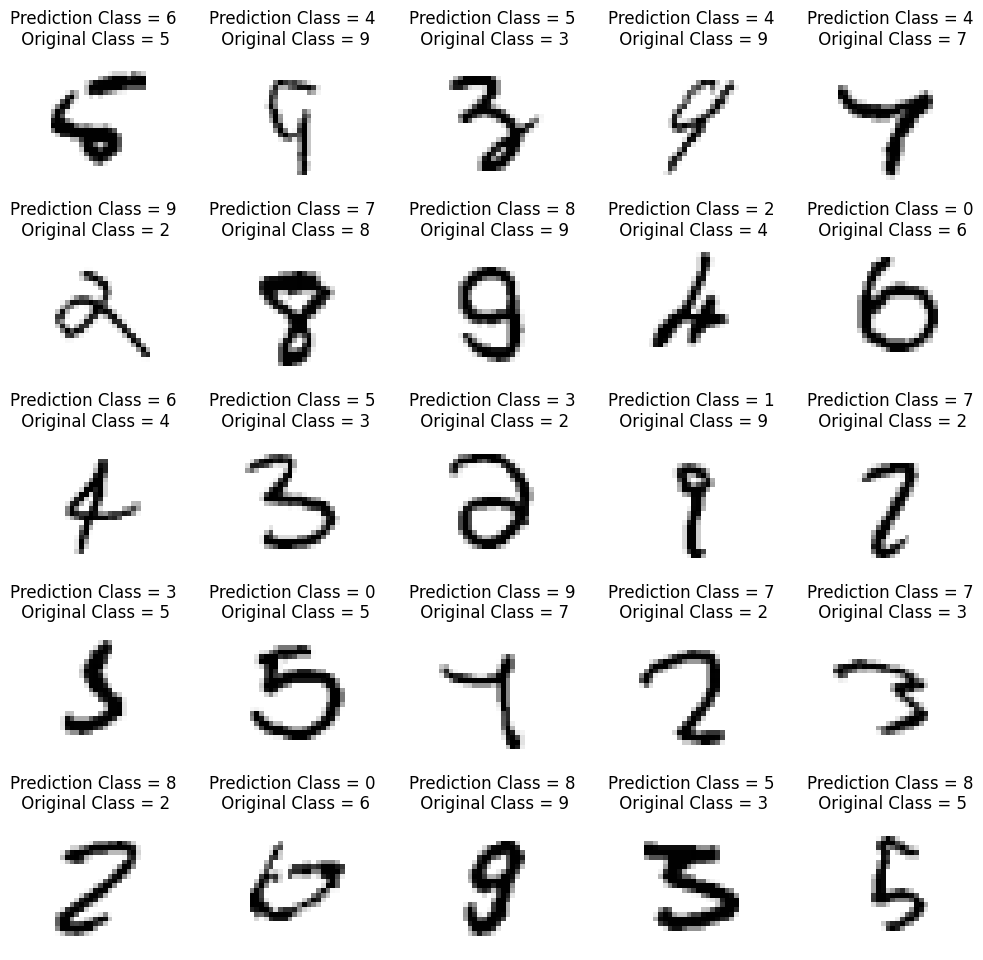

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):
    input_im = x_test[misclassified_indices[0][i]]
    ind = misclassified_indices[0][i]
    predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
    axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
x_test=x_test.reshape(10000,28,28,1)
y_pred=np.argmax(model.predict(x_test),axis=-1)
print(confusion_matrix(y_test,pred))

313/313 [==============================] - 1s 3ms/step
[[ 966    0    1    2    1    3    4    1    2    0]
 [   0 1115    3    2    0    1    3    2    9    0]
 [   8    2  961   15    6    2    7    9   18    4]
 [   2    2   11  951    0   11    1   11   12    9]
 [   1    1    7    0  934    0    6    1    3   29]
 [  10    2    0   20    2  825   11    1   15    6]
 [  10    3    3    2    6    8  920    2    4    0]
 [   0    6   22    2    8    0    0  957    2   31]
 [   7    2    2   12    6   13   10    7  906    9]
 [   8    7    1    9   26    2    1    7    5  943]]
